In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import LearningCurveDisplay
from sklearn.base import clone

In [55]:
path=r'/home/ludovico/ML-project/data/monks-2'
monk1_train = pd.read_csv(path+'.train', header=None, delim_whitespace=True, dtype=str)
monk1_test = pd.read_csv(path+'.test', header=None, delim_whitespace=True, dtype=str)

y_train=monk1_train[0]
x_train=monk1_train[monk1_train.columns[1:-1]]

y_test=monk1_test[0]
x_test=monk1_test[monk1_train.columns[1:-1]]

'''
x_train=pd.get_dummies(x_train)
x_test=pd.get_dummies(x_test)
'''


'\nx_train=pd.get_dummies(x_train)\nx_test=pd.get_dummies(x_test)\n'

In [56]:
encoder = OneHotEncoder(sparse_output=False)
x_train = encoder.fit_transform(x_train)
x_test = encoder.fit_transform(x_test)


In [58]:
estimator_MLP = MLPClassifier()


parameters_MLP= {
'learning_rate': [ "invscaling", "adaptive"],
'hidden_layer_sizes': [(4,), (8,)],
'alpha': [0.0001,0.01],
'activation': ['relu'],
'learning_rate_init': [ 0.01, 0.1],
'power_t': [0.2],
'max_iter': [300],
'batch_size':[1],
'solver' : ['sgd'],
'early_stopping': [False],
'n_iter_no_change': [10],
'momentum': [0,0.1,0.5],
'nesterovs_momentum': [False],
'tol': [1e-4],
'validation_fraction': [0.1],
#'random_state':[0]
}



# with GridSearch
grid_search = GridSearchCV(
    estimator=estimator_MLP,
    param_grid=parameters_MLP,
    scoring = 'accuracy',
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=0),
    n_jobs=-1,
    return_train_score = True,
    refit=True
)


In [59]:
MLP=grid_search.fit(x_train, y_train)
print(grid_search.best_params_) 
print('Best Score - Validation:', grid_search.best_score_ )
y_pred =MLP.predict(x_test)

print('Accuracy Score - Test-error:', metrics.accuracy_score(y_test, y_pred))

cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df[['mean_test_score','mean_train_score','param_learning_rate','param_hidden_layer_sizes','param_activation']]


/home/ludovico/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ludovico/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ludovico/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ludovico/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ludovico/.local/lib/python3.10/sit

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 1, 'early_stopping': False, 'hidden_layer_sizes': (4,), 'learning_rate': 'invscaling', 'learning_rate_init': 0.1, 'max_iter': 500, 'momentum': 0, 'n_iter_no_change': 10, 'nesterovs_momentum': False, 'power_t': 0.2, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.1}
Best Score - Validation: 1.0
Accuracy Score - Test-error: 1.0


,mean_test_score,mean_train_score,param_learning_rate,param_hidden_layer_sizes,param_activation
0,0.952941,0.967407,invscaling,"(4,)",relu
1,0.882353,0.917037,invscaling,"(4,)",relu
2,0.952941,0.951111,invscaling,"(4,)",relu
3,1.000000,1.000000,invscaling,"(4,)",relu
4,1.000000,1.000000,invscaling,"(4,)",relu
5,0.923529,0.924444,invscaling,"(4,)",relu
6,0.933333,0.976471,adaptive,"(4,)",relu
7,0.917647,0.958519,adaptive,"(4,)",relu
8,1.000000,1.000000,adaptive,"(4,)",relu
9,0.904991,0.960098,adaptive,"(4,)",relu


{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 1,
 'early_stopping': False,
 'hidden_layer_sizes': (4,),
 'learning_rate': 'invscaling',
 'learning_rate_init': 0.1,
 'max_iter': 500,
 'momentum': 0,
 'n_iter_no_change': 10,
 'nesterovs_momentum': False,
 'power_t': 0.2,
 'solver': 'sgd',
 'tol': 0.0001,
 'validation_fraction': 0.1}

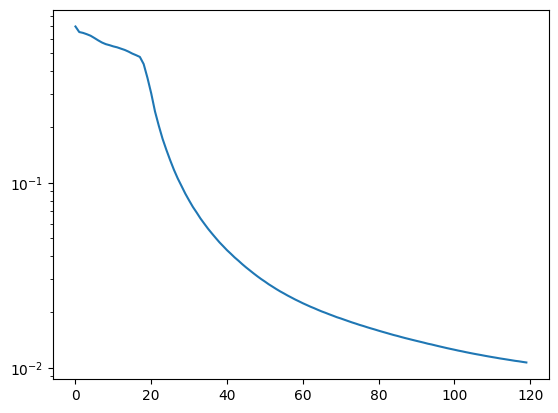

In [60]:
best_estimator = grid_search.best_estimator_


plt.plot(best_estimator.loss_curve_)
plt.yscale('log')
#plt.plot(best_estimator.validation_scores_)
grid_search.best_params_

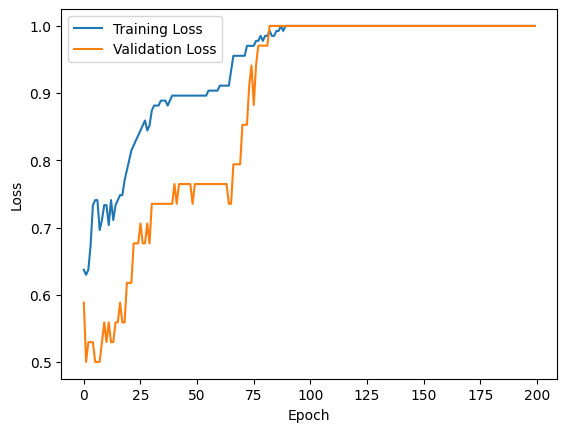

In [63]:
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
import numpy as np


# Split the data into training and validation sets
x_train_cl, x_val, y_train_cl, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0, stratify=y_train, shuffle=True)

best_params=grid_search.best_params_
best_params['early_stopping']=False

# Initialize the classifier
clf=clone(MLPClassifier(**best_params))

# Lists to store training and validation loss
train_loss = []
val_loss = []
train_acc = []
val_acc = []

# Training loop
for epoch in range(200):
    # Partial fit on the training set
    clf.partial_fit(x_train_cl, y_train_cl, classes=np.unique(y_train_cl))

    # Calculate training loss
    y_train_pred = clf.predict(x_train_cl)
    train_acc.append(metrics.accuracy_score(y_train_cl, y_train_pred))
    #train_loss.append(metrics.log_loss(y_train_cl, (y_train_pred)))

    # Calculate validation loss
    y_val_pred = clf.predict(x_val)
    val_acc.append(metrics.accuracy_score(y_val, y_val_pred))
    #val_loss.append(metrics.log_loss(y_val, (y_val_pred)))

# Plot the loss curves
plt.plot(train_acc, label='Training Loss')
plt.plot(val_acc, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()